In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [103]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')
print(f'Shape of the data: {rain_data.shape}')
rain_data.head()

Shape of the data: (67021, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


# Preprocessing

In [104]:
print(rain_data.dtypes)
rain_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [105]:
# Create new variable from the date column

rain_data['Date'] = pd.to_datetime(rain_data['Date'])
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day
rain_data['Year'] = rain_data['Date'].dt.year
rain_data.drop('Date', axis=1, inplace=True)

# Missing values

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1157,1.726325,float64
MaxTemp,1081,1.612927,float64
Rainfall,2750,4.103192,float64
Evaporation,29430,43.911610,float64
Sunshine,32190,48.029722,float64
WindGustDir,5487,8.186986,object
WindGustSpeed,5445,8.124319,float64
WindDir9am,4751,7.088823,object
WindDir3pm,2288,3.413855,object


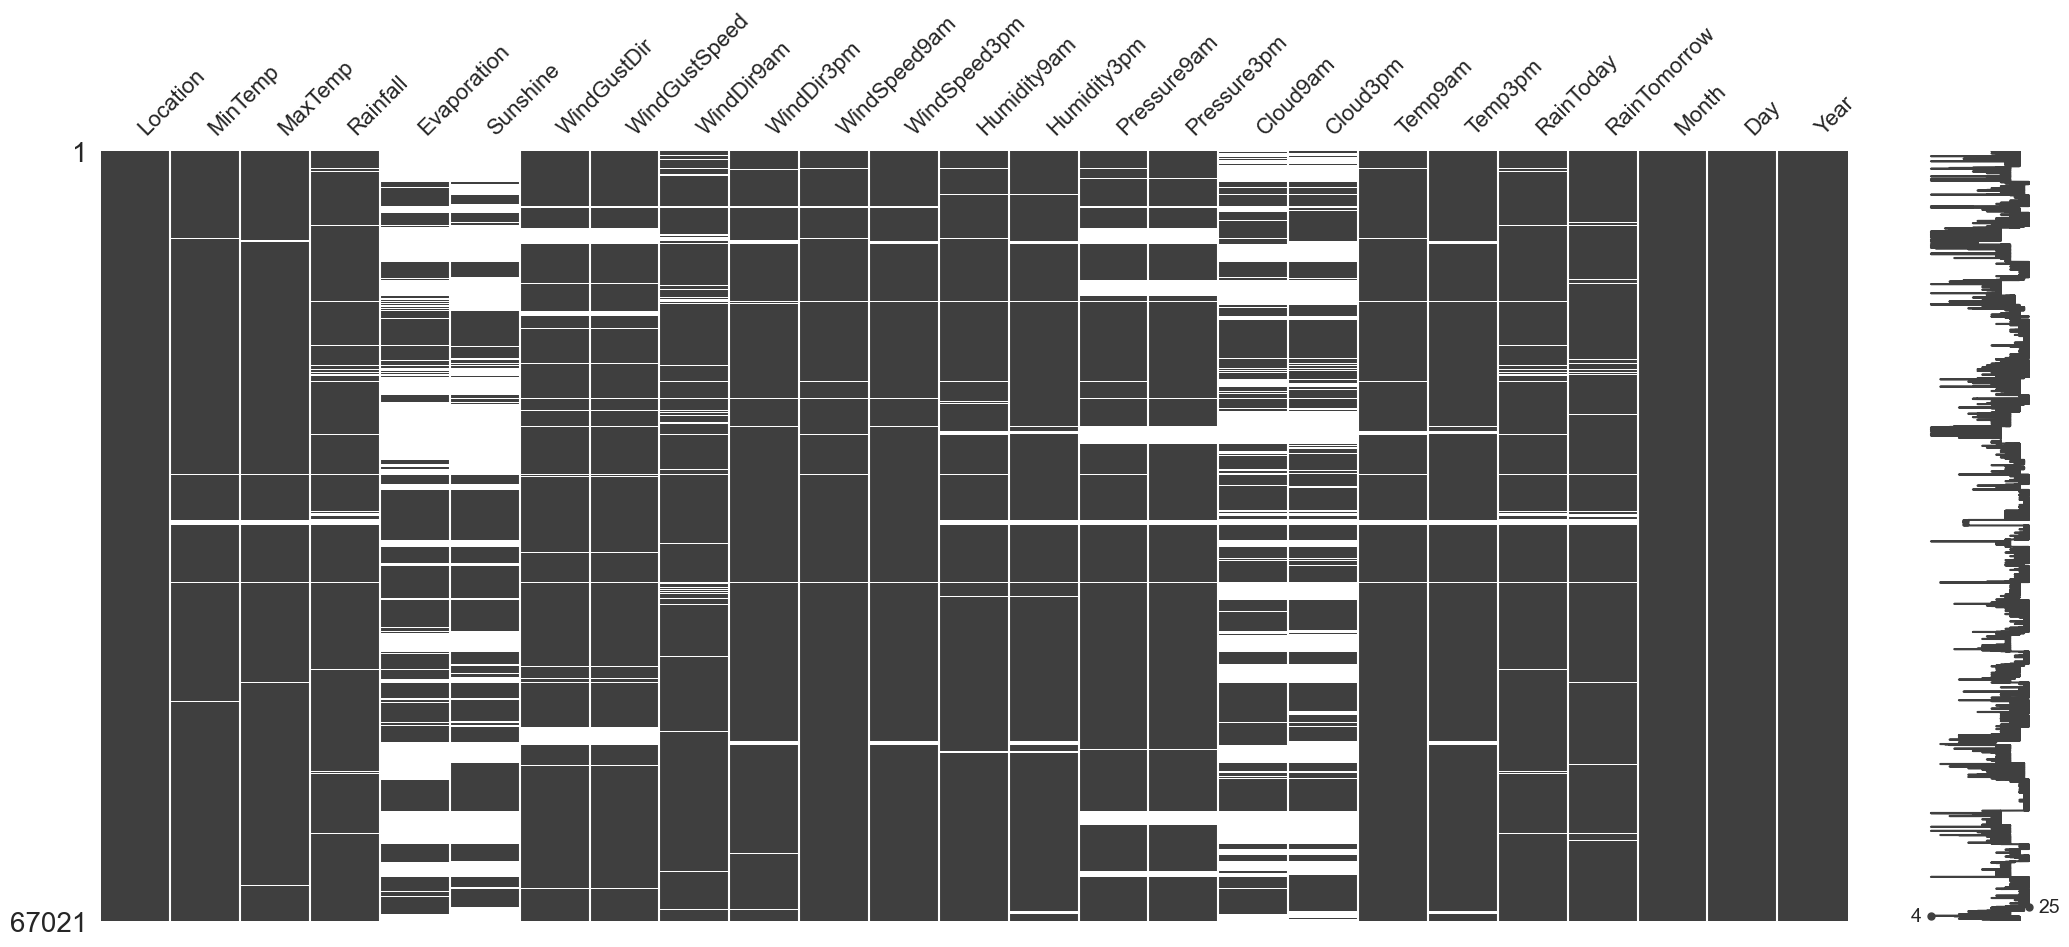

In [106]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

def create_missing_data_frame():
    # Create a table with data missing 
    missing_values=rain_data.isnull().sum() # missing values

    percent_missing = rain_data.isnull().sum()/rain_data.shape[0]*100 # missing value %

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing , 
        'data type' : rain_data.dtypes
    }
    frame=pd.DataFrame(value)
    return frame

missing_data=create_missing_data_frame()
missing_data

Shape of the data: (32720, 25)


,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,583,1.781785,float64
MaxTemp,576,1.760391,float64
Rainfall,838,2.561125,float64
Evaporation,0,0.000000,float64
Sunshine,0,0.000000,float64
WindGustDir,2265,6.922372,object
WindGustSpeed,2251,6.879584,float64
WindDir9am,1134,3.465770,object
WindDir3pm,403,1.231663,object


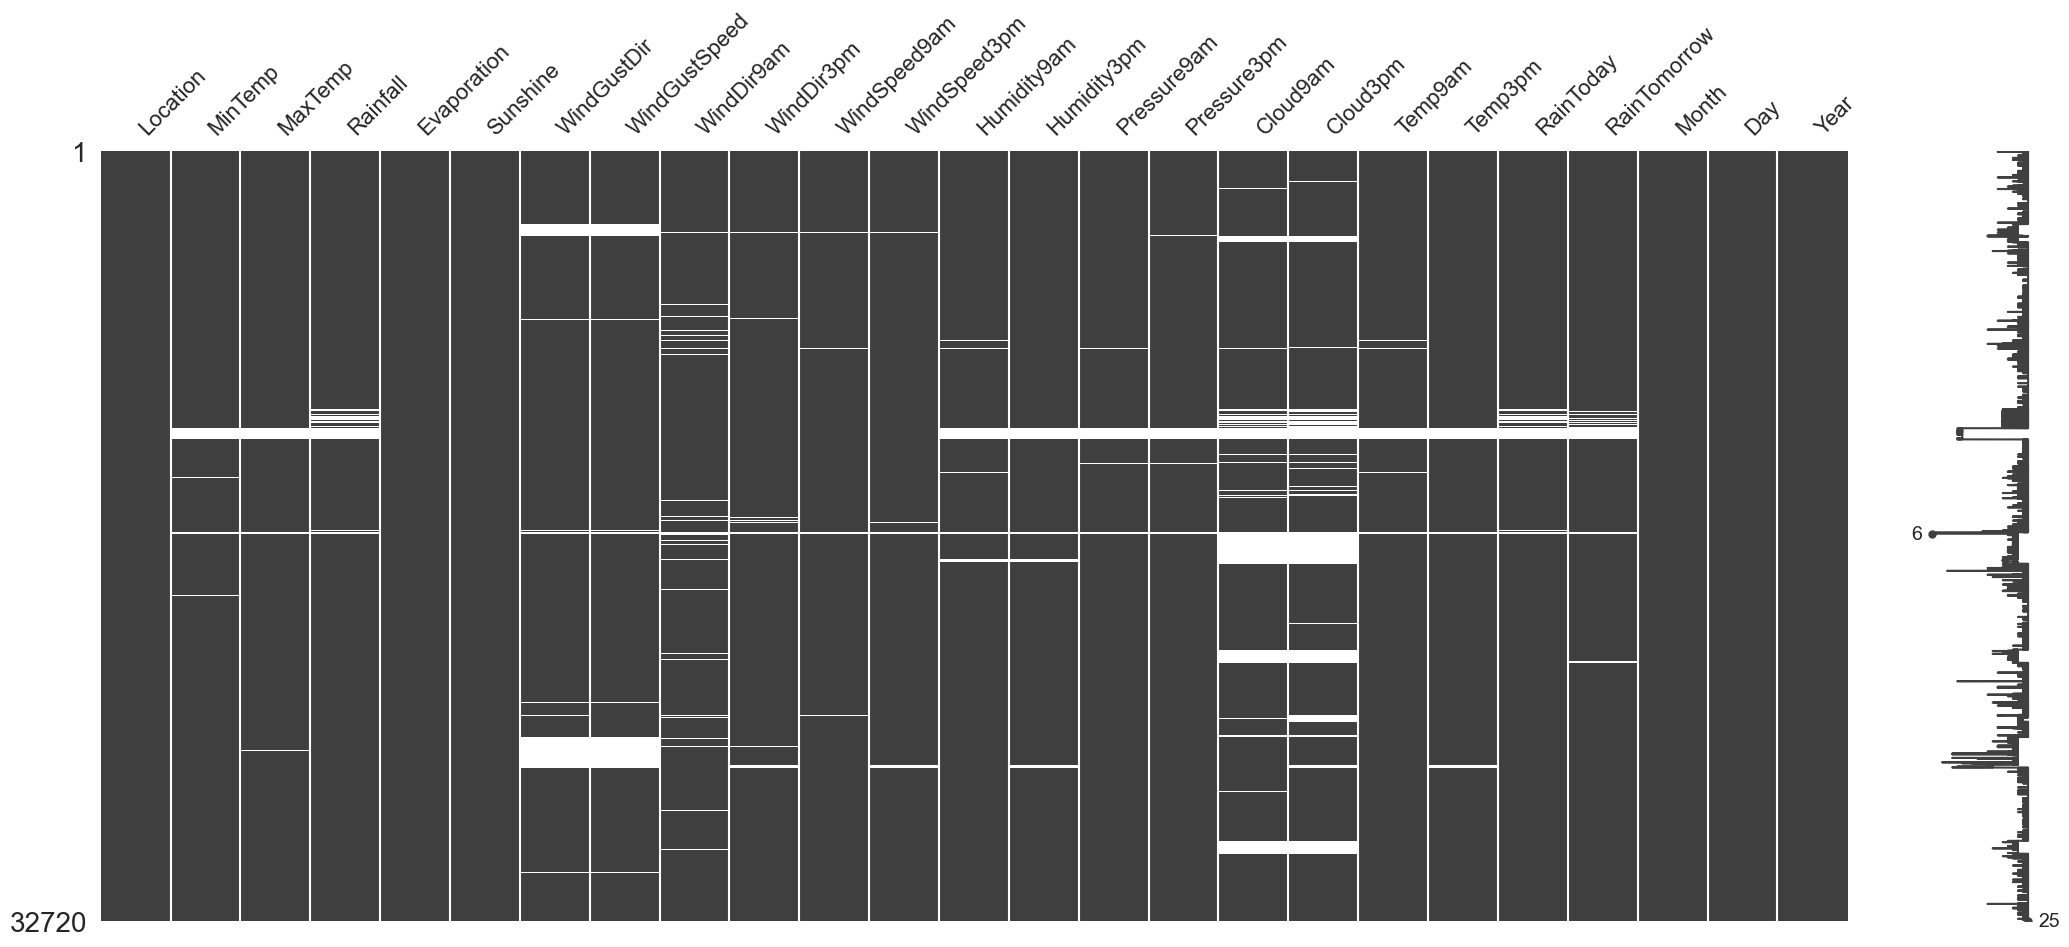

In [107]:
# Delete the rows that have missing values in 'Evaporation' and 'Sunshine'

rain_data.dropna(subset=['Evaporation', 'Sunshine'], inplace=True)
msno.matrix(rain_data)
missing_data=create_missing_data_frame()

print(f'Shape of the data: {rain_data.shape}')
missing_data

# Impute the rest of values

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(data):
    # Separate numerical and categorical columns
    df = data.copy()
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    # Imputation for numerical variables using MICE with KNN
    mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='median', max_iter=20, tol=0.01, random_state=42)
    df[numerical_cols] = mice_imputer.fit_transform(df[numerical_cols])
    
    # Round Cloud9am and Cloud3pm after imputation for better interpretation
    cloud_cols = ['Cloud9am', 'Cloud3pm']
    for col in cloud_cols:
        df[col] = df[col].apply(lambda x: min(8, max(0, round(x))))
    
    # Imputation for categorical variables using Random Forest
    for column in categorical_cols:
        rf_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
        non_na_data = df[df[column].notna()]
        na_data = df[df[column].isna()]
        if na_data.empty:
            continue
        rf_imputer.fit(non_na_data.drop(columns=categorical_cols), non_na_data[column])
        imputed_values = rf_imputer.predict(na_data.drop(columns=categorical_cols))
        df.loc[df[column].isna(), column] = imputed_values
    
    return df

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score



def hide_data(df, hide_ratio=0.1):
    """
    Randomly hides data in the DataFrame based on the specified ratio,
    except for the specified columns: 'Sunshine', 'Evaporation', 'Date', and 'Location'.
    """
    df_copy = df.copy()
    # Create a True/False mask for the entire DataFrame
    mask = np.random.rand(*df.shape) < hide_ratio

    # Convert the numpy array mask to a DataFrame to manipulate columns by name
    mask_df = pd.DataFrame(mask, columns=df.columns, index=df.index)

    # Exclude specified columns from the mask by setting them to False
    excluded_columns = ['Sunshine', 'Evaporation', 'Date', 'Location', 'month', 'day', 'year']
    mask_df[excluded_columns] = False

    # Apply the mask to df_copy to hide the data
    df_copy[mask_df] = np.nan
    original_data = df.where(mask_df)
    
    return df_copy, original_data

def evaluate_imputation(df, hide_ratio=0.1):
    df_hidden, original_data = hide_data(df, hide_ratio)
    df_imputed = impute_dataset(df_hidden)
    
    metrics_num = {}
    metrics_cat = {}

    for column in df.columns:
        if column in ['Sunshine', 'Evaporation', 'Date', 'Location', 'month', 'day', 'year']:
            continue
        if df[column].dtype in ['float64', 'int64']:
            valid_index = original_data[column].dropna().index.intersection(df_imputed.index)
            if not valid_index.empty:
                mse = mean_squared_error(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                r2 = r2_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                # Storing metrics for each numerical variable
                metrics_num[column] = {
                    'MSE': mse,
                    'R2': r2,
                }
        elif df[column].dtype == 'object':
            valid_index = original_data[column].dropna().index.intersection(df_imputed.index)
            if not valid_index.empty:
                accuracy = accuracy_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                f1 = f1_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index], average='weighted')
                # Storing metrics for each categorical variable
                metrics_cat[column] = {
                    'Accuracy': accuracy,
                    'F1 Score': f1
                }
    
    return metrics_num, metrics_cat

# Evaluate the imputation performance
evaluate_imputation_dataset = rain_data.copy()
metrics_num, metrics_cat = evaluate_imputation(evaluate_imputation_dataset, hide_ratio=0.1)

# Convert the results to DataFrames for better visualization
df_metrics_num = pd.DataFrame(metrics_num).T
df_metrics_cat = pd.DataFrame(metrics_cat).T

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## PRINT THE IMPUTATION RESULTS

In [110]:
# Print the results
print("Numerical Variables Imputation Metrics:")
df_metrics_num

Numerical Variables Imputation Metrics:


,MSE,R2
MinTemp,6.797429,0.827358
MaxTemp,4.295250,0.913624
Rainfall,67.442858,0.136078
WindGustSpeed,88.785490,0.574440
WindSpeed9am,51.531962,0.342583
WindSpeed3pm,44.346276,0.432570
Humidity9am,129.505428,0.598955
Humidity3pm,137.809655,0.680962
Pressure9am,13.223055,0.761830
Pressure3pm,13.389974,0.753151


In [111]:
print("Categorical Variables Imputation Metrics:")
df_metrics_cat

Categorical Variables Imputation Metrics:


,Accuracy,F1 Score
WindGustDir,0.212091,0.202728
WindDir9am,0.230450,0.218240
WindDir3pm,0.211870,0.208233
RainToday,0.968721,0.968884
RainTomorrow,0.810896,0.810896


# IMPUTE THE ORIGINAL DATASET

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

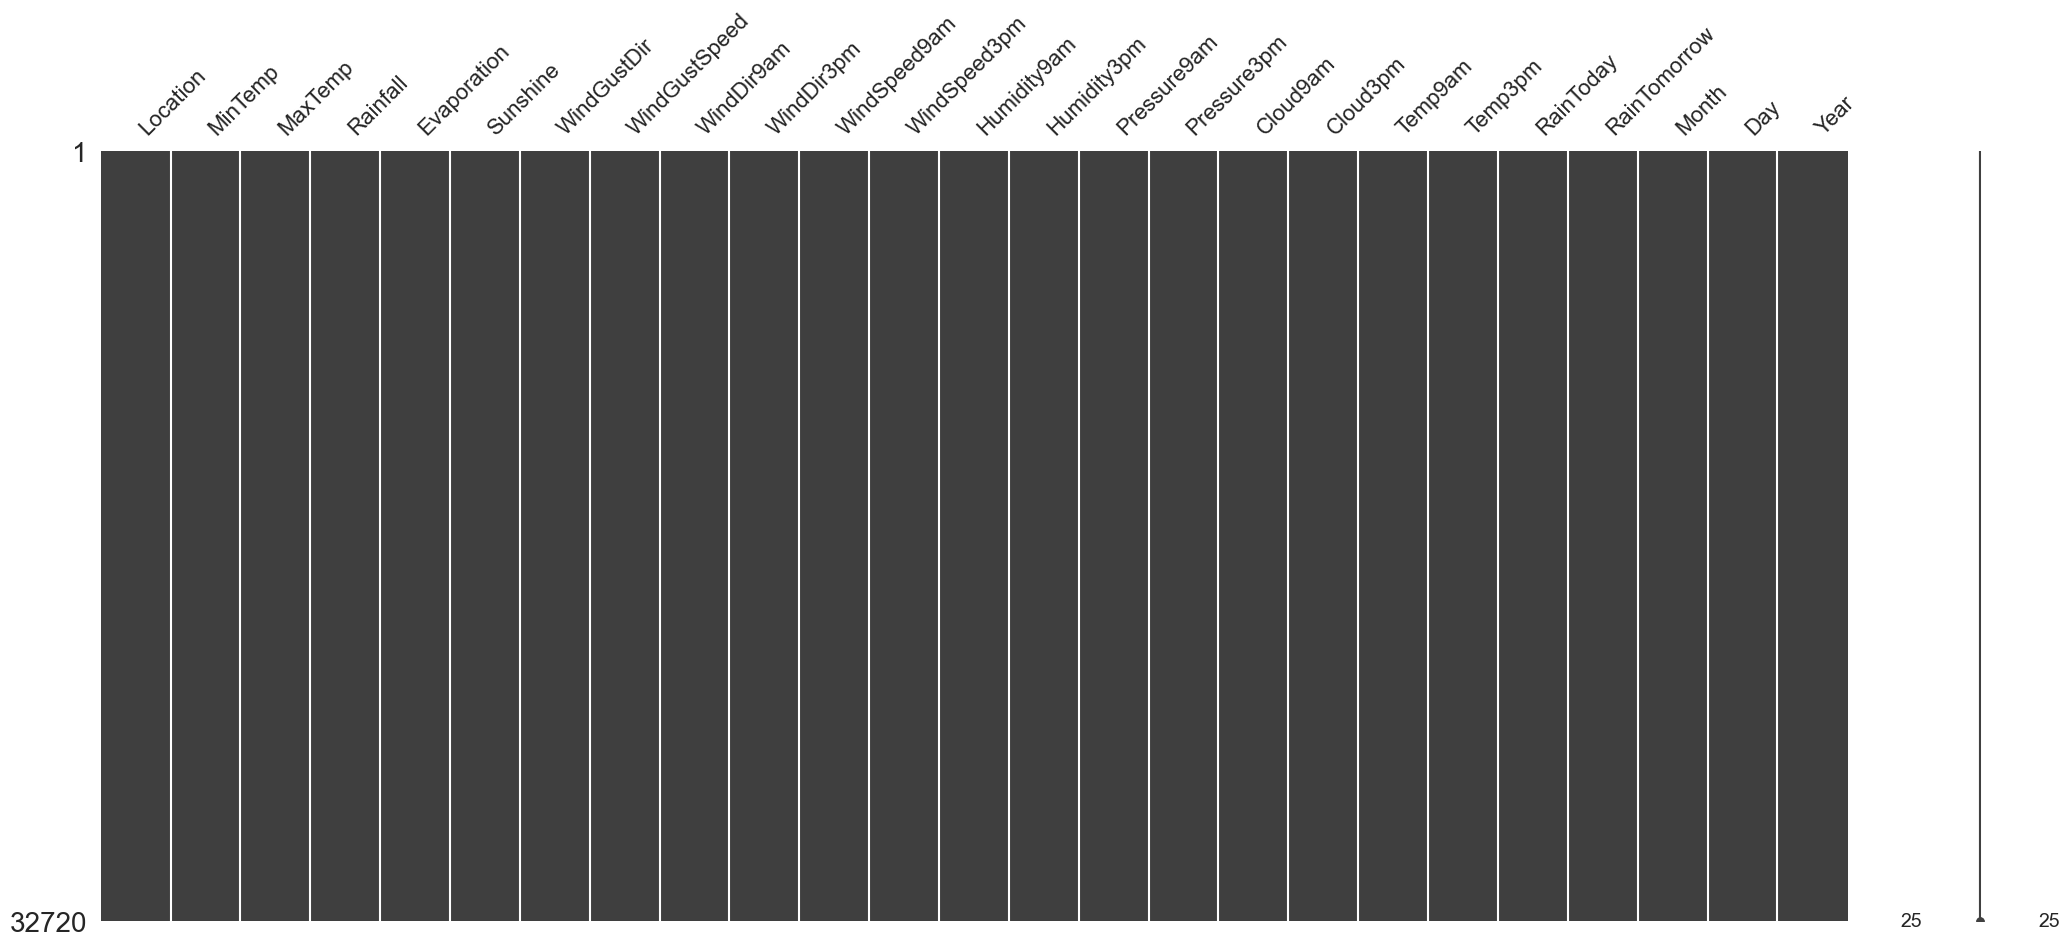

In [112]:
imputed_rain_data = impute_dataset(rain_data)

# Visualize that there are no missing values
msno.matrix(imputed_rain_data)

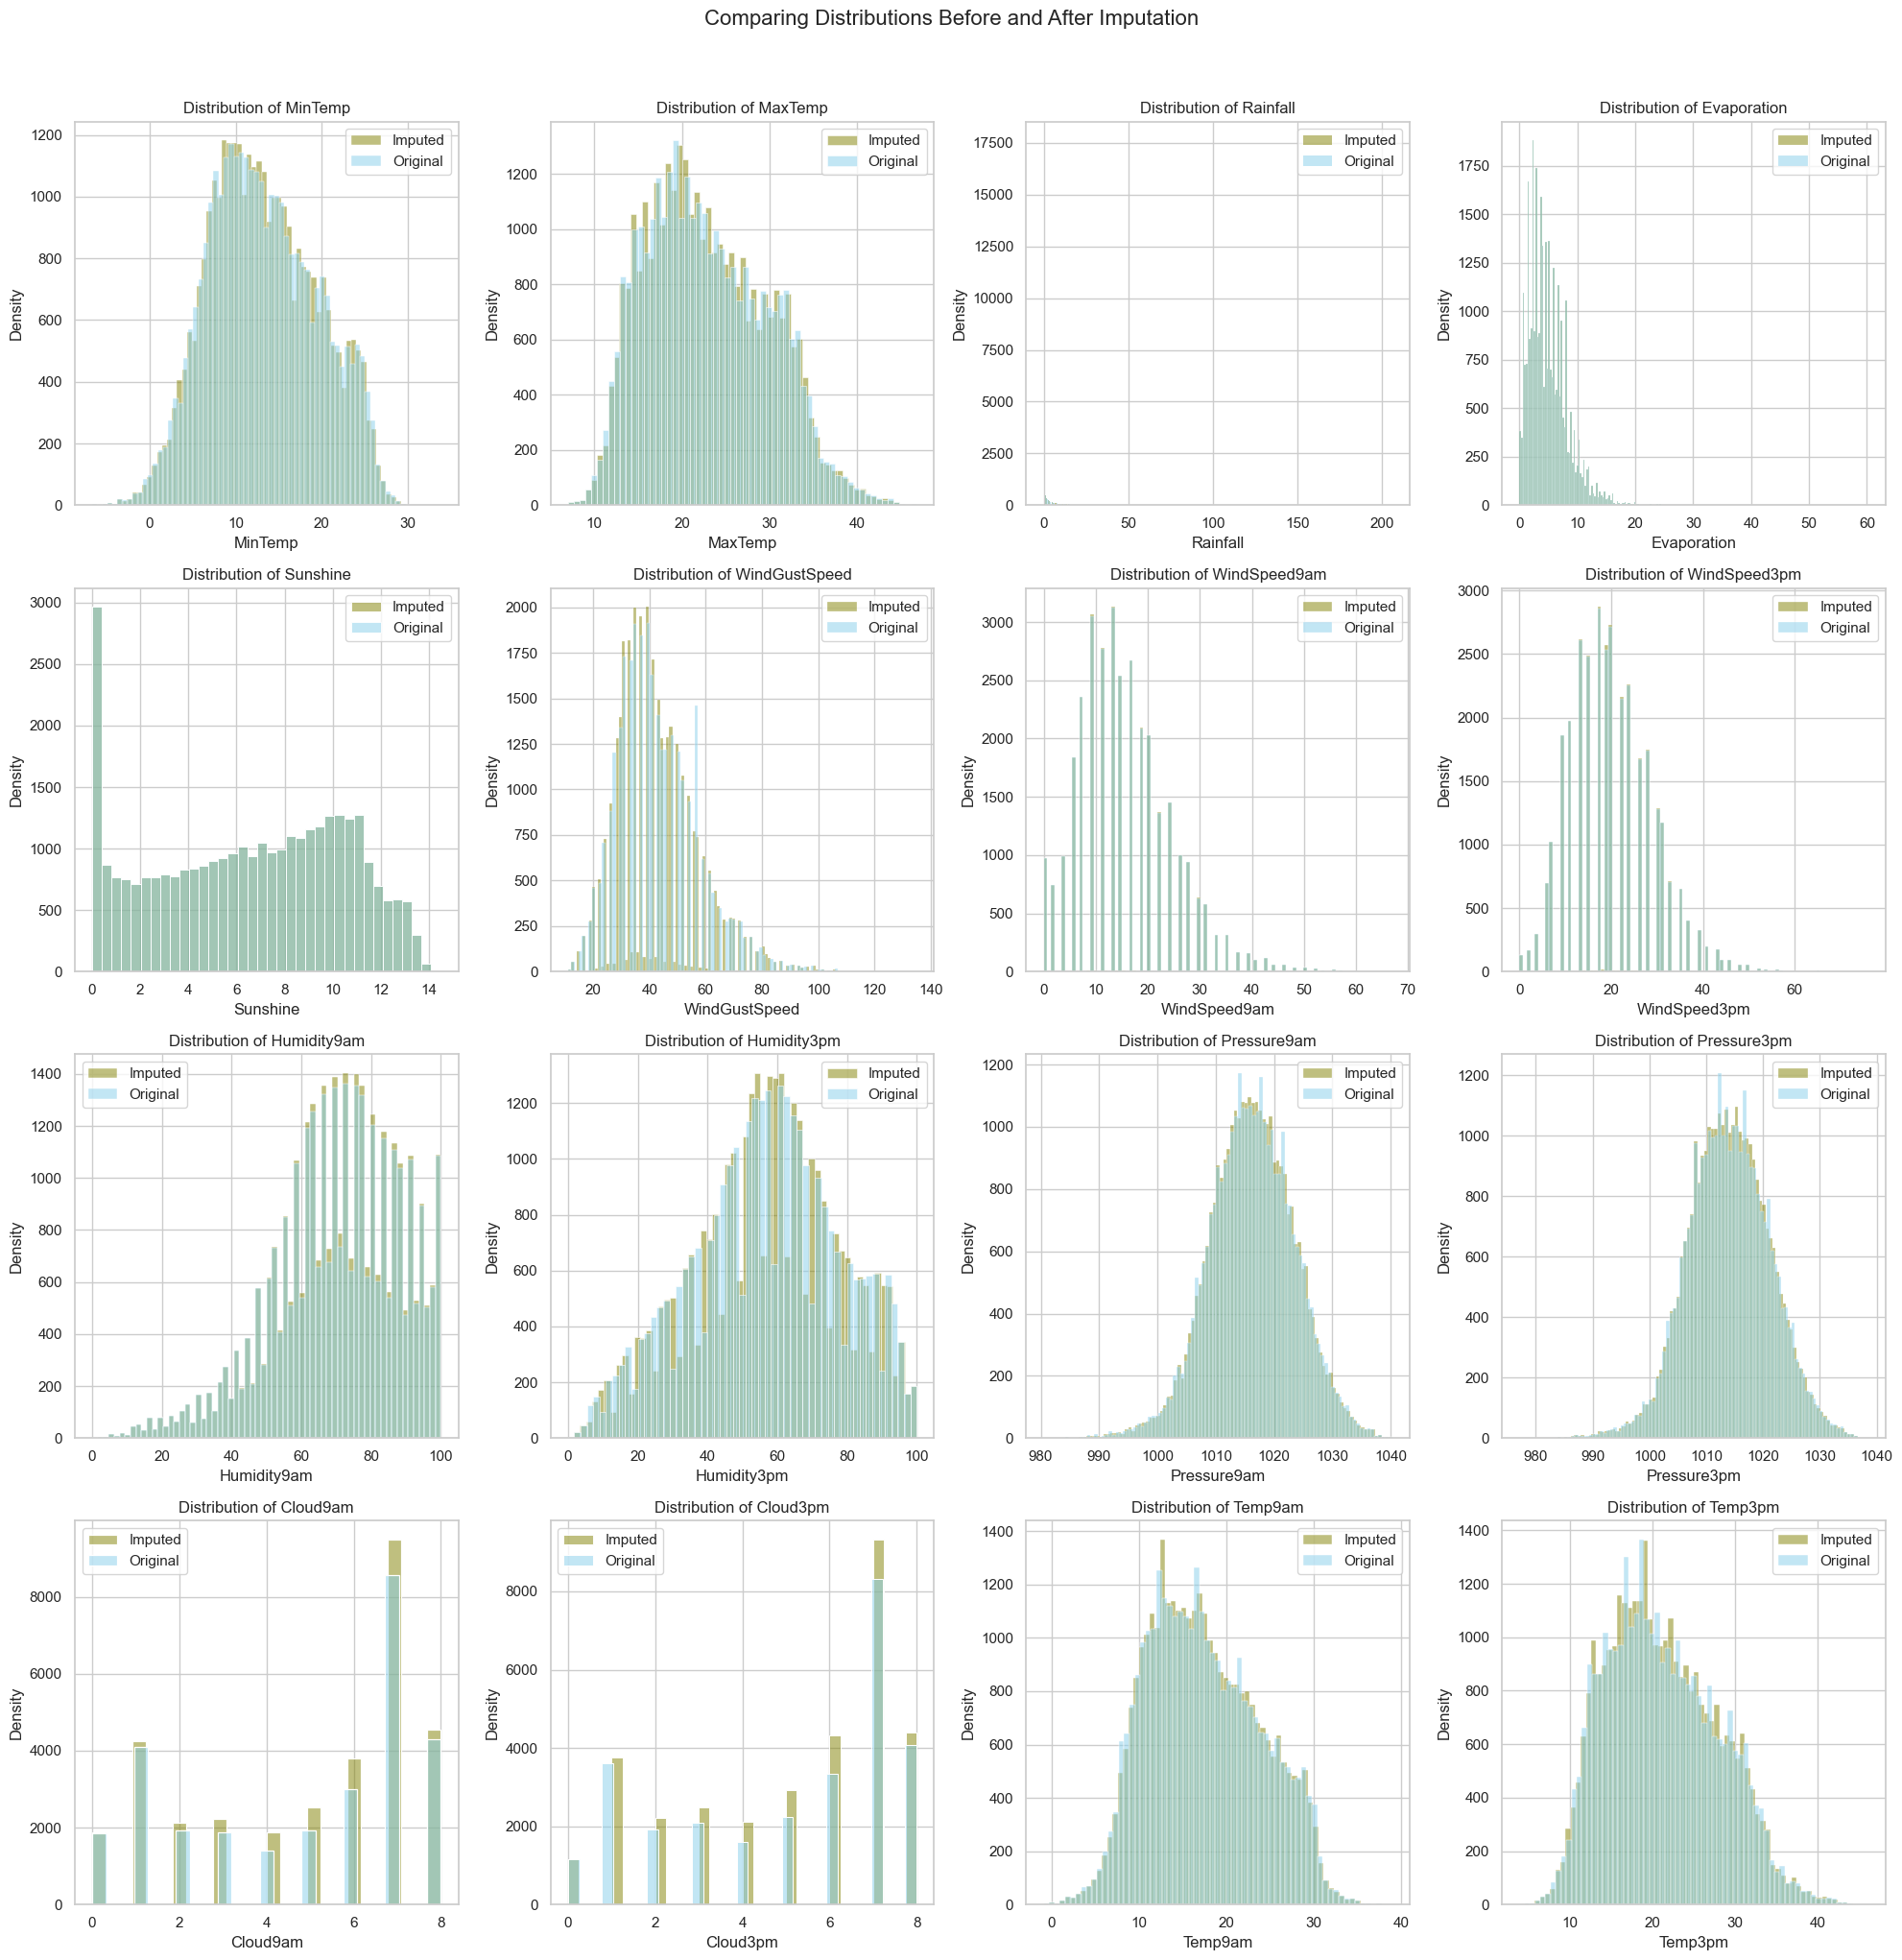

In [113]:
# Configuration of seaborn aesthetics for the plots
sns.set(style="whitegrid")


def compare_distributions(original_df, imputed_df):
    numerical_cols = original_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numerical_cols)
    n_rows = max(n_cols // 4, 1)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 5 * n_rows))  # Adjust the size of the plot
    fig.suptitle('Comparing Distributions Before and After Imputation', fontsize=16, y=1.02)

    axes = axes.flatten()  # Flatten the 2D array of subplots

    # Iterate over the numerical columns and plot the distributions
    for ax, column in zip(axes, numerical_cols):
        sns.histplot(imputed_df[column], kde=False, color="olive", alpha=0.5, label='Imputed', ax=ax)
        sns.histplot(original_df[column], kde=False, color="skyblue", alpha=0.5, label='Original', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()
    
    # Hide the empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Compare the distributions of the original and imputed data
compare_distributions(rain_data, imputed_rain_data)

# TRAINING ML MODELS

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score



# Separation of the target variable and the features
X = imputed_rain_data.drop('RainTomorrow', axis=1)
y = imputed_rain_data['RainTomorrow']
# Convert the target variable to binary in order to train more easily the models
y = y.replace({'Yes': 1, 'No': 0})
y.astype('int64')

# Division of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Selection of the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creation of the preprocessor with the StandardScaler for numerical variables and OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Training and evaluation of the models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"{name}:\n Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}")

Logistic Regression:
 Accuracy: 0.80, ROC AUC: 0.88
Random Forest:
 Accuracy: 0.80, ROC AUC: 0.89
Gradient Boosting:
 Accuracy: 0.80, ROC AUC: 0.88


# TRAINING NN MODELS

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import legacy  # Use legacy optimizer if required
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def train_and_visualize_nn(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32, use_early_stopping=False):
    """
    Trains a neural network model and visualizes the training process.
    Args:
    model: Compiled neural network model.
    X_train, y_train: Training data and labels.
    X_val, y_val: Validation data and labels.
    epochs: Number of epochs to train.
    batch_size: Size of batches to use in training.
    use_early_stopping: Boolean to decide if early stopping should be used.
    
    Returns:
    model: Trained neural network model.
    history: History object containing training history.
    """
    callbacks = []
    if use_early_stopping:
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        callbacks.append(early_stopping)
    
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=1)
    
    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Model Accuracy: {accuracy:.4f}")

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    return model, history


# Transforming the data using the preprocessor and converting it to a numpy array
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()

# Creating the final training and validation sets
validation_size = int(0.2 * X_train_transformed.shape[0])
X_train_final, X_val = X_train_transformed[:-validation_size], X_train_transformed[-validation_size:]
y_train_final, y_val = y_train[:-validation_size], y_train[-validation_size:]


## NN with only one layer and SIGMOID activation function
This is the same as training a Logistic Regression model of sklearn with a different optimizer

Epoch 1/250
230/230 [==============================] - 0s 582us/step - loss: 0.6609 - accuracy: 0.6082 - val_loss: 0.5822 - val_accuracy: 0.6991
Epoch 2/250
230/230 [==============================] - 0s 411us/step - loss: 0.5409 - accuracy: 0.7368 - val_loss: 0.5151 - val_accuracy: 0.7631
Epoch 3/250
230/230 [==============================] - 0s 408us/step - loss: 0.4954 - accuracy: 0.7692 - val_loss: 0.4869 - val_accuracy: 0.7784
Epoch 4/250
230/230 [==============================] - 0s 411us/step - loss: 0.4741 - accuracy: 0.7801 - val_loss: 0.4724 - val_accuracy: 0.7823
Epoch 5/250
230/230 [==============================] - 0s 825us/step - loss: 0.4621 - accuracy: 0.7854 - val_loss: 0.4637 - val_accuracy: 0.7886
Epoch 6/250
230/230 [==============================] - 0s 517us/step - loss: 0.4541 - accuracy: 0.7877 - val_loss: 0.4576 - val_accuracy: 0.7904
Epoch 7/250
230/230 [==============================] - 0s 443us/step - loss: 0.4487 - accuracy: 0.7897 - val_loss: 0.4532 - val_ac

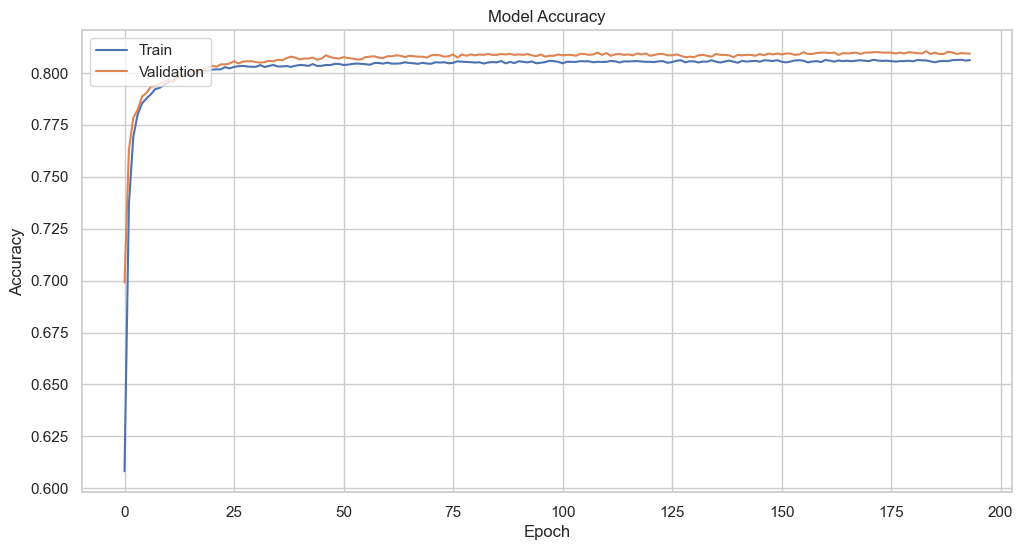

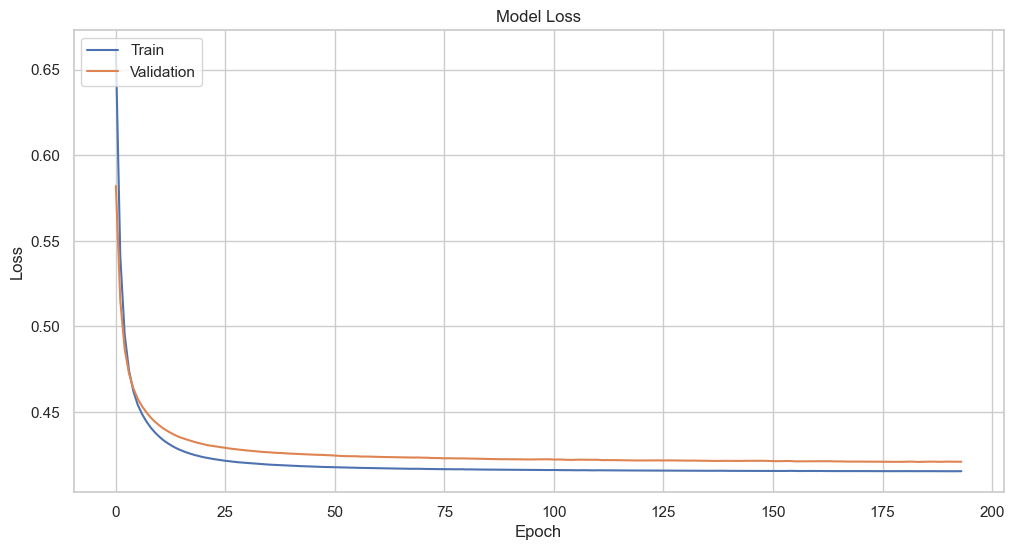

In [124]:
# Build and compile the neural network model wih only one layer and sigmoid activation function

model = Dense(1, activation='sigmoid')
model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train and visualize the model
model, history = train_and_visualize_nn(model, X_train_final, y_train_final, X_val, y_val, epochs=250, batch_size=80, use_early_stopping=True)

## More complex NN structure

Epoch 1/250
230/230 [==============================] - 1s 2ms/step - loss: 1.1979 - accuracy: 0.6858 - val_loss: 1.0086 - val_accuracy: 0.7882
Epoch 2/250
230/230 [==============================] - 0s 1ms/step - loss: 1.0126 - accuracy: 0.7587 - val_loss: 0.9167 - val_accuracy: 0.7939
Epoch 3/250
230/230 [==============================] - 0s 1ms/step - loss: 0.9166 - accuracy: 0.7740 - val_loss: 0.8379 - val_accuracy: 0.7945
Epoch 4/250
230/230 [==============================] - 0s 1ms/step - loss: 0.8340 - accuracy: 0.7818 - val_loss: 0.7712 - val_accuracy: 0.7987
Epoch 5/250
230/230 [==============================] - 0s 1ms/step - loss: 0.7678 - accuracy: 0.7850 - val_loss: 0.7146 - val_accuracy: 0.8007
Epoch 6/250
230/230 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.7931 - val_loss: 0.6651 - val_accuracy: 0.8057
Epoch 7/250
230/230 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7938 - val_loss: 0.6239 - val_accuracy: 0.8092

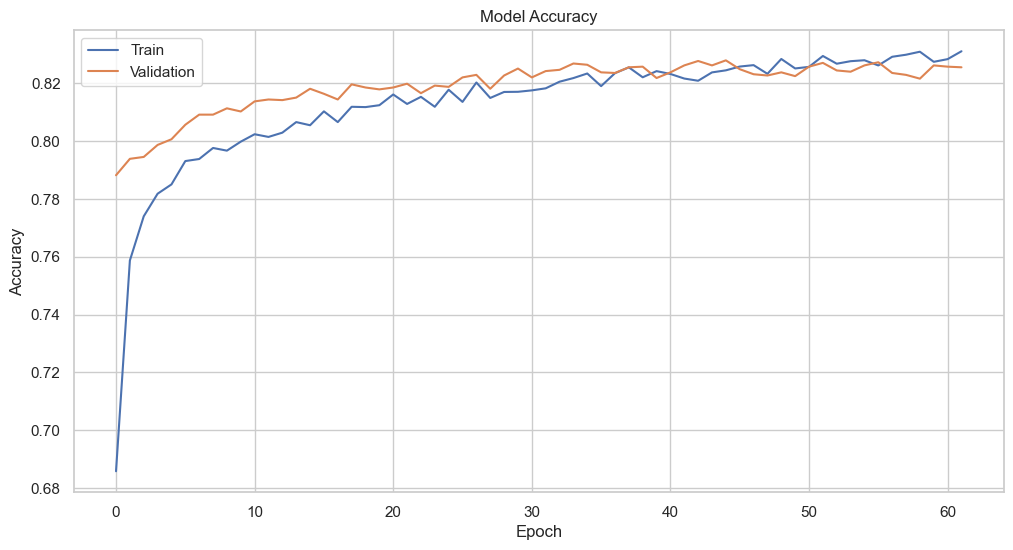

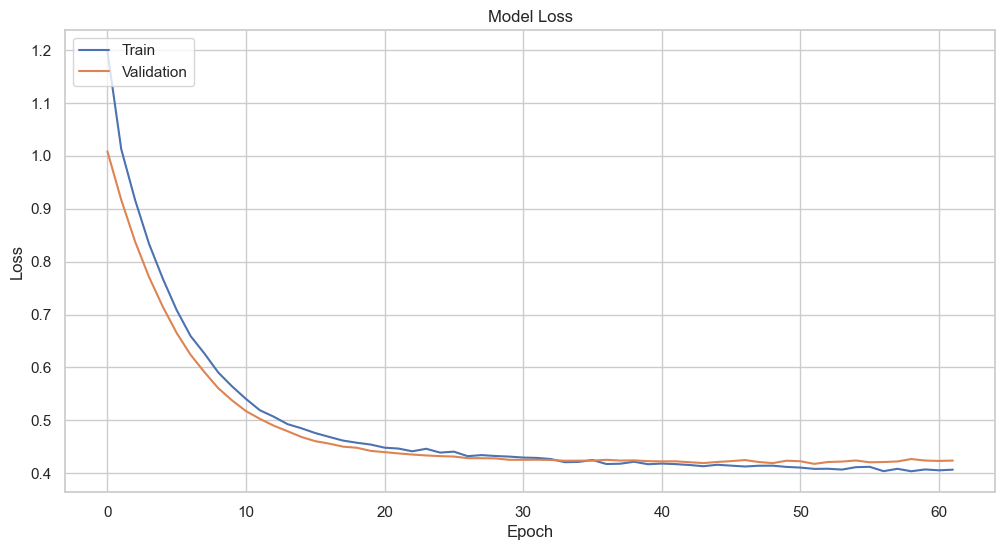

In [123]:
# Configuration of the neural network model

def build_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(64, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the model
model = build_model(X_train_transformed.shape[1])
model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train and visualize the model
model, history = train_and_visualize_nn(model, X_train_final, y_train_final, X_val, y_val, epochs=250, batch_size=80, use_early_stopping=True)